## Process data from baseball savant (statcast) search

- Search query 
    - https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=single%7Cdouble%7Ctriple%7Chome%5C.%5C.run%7Cfield%5C.%5C.out%7Cstrikeout%7Cstrikeout%5C.%5C.double%5C.%5C.play%7Cdouble%5C.%5C.play%7Cgrounded%5C.%5C.into%5C.%5C.double%5C.%5C.play%7Cfielders%5C.%5C.choice%7Cfielders%5C.%5C.choice%5C.%5C.out%7Cforce%5C.%5C.out%7Csac%5C.%5C.bunt%7Csac%5C.%5C.bunt%5C.%5C.double%5C.%5C.play%7Csac%5C.%5C.fly%7Csac%5C.%5C.fly%5C.%5C.double%5C.%5C.play%7Ctriple%5C.%5C.play%7C&hfBBT=&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea=2018%7C&hfSit=&player_type=batter&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfPull=&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=name&sort_col=pitches&player_event_sort=h_launch_speed&sort_order=desc&min_pas=0#results
- Data reference
    - https://baseballsavant.mlb.com/csv-docs

In [1]:
import pandas as pd

hits = pd.read_csv('hits_2018.csv')
outs = pd.read_csv('outs_2018.csv')

hits['hit'] = 1
outs['hit'] = 0

In [3]:
total = hits.append(outs, ignore_index=True)
total.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,hit
0,FC,2018-10-01,91.6,-2.1730,6.2328,Trevor Story,596115,445276,home_run,hit_into_play_score,...,1,1,5,1,5,1,5,Standard,Standard,1
1,SL,2018-10-01,83.9,3.7307,4.9226,Javier Baez,595879,623352,single,hit_into_play_no_out,...,3,1,3,3,1,1,3,Strategic,Standard,1
2,FC,2018-10-01,92.4,-2.0046,6.3131,Nolan Arenado,571448,445276,home_run,hit_into_play_score,...,0,0,5,0,5,0,5,Standard,Strategic,1
3,FF,2018-10-01,89.9,1.3879,6.1068,Orlando Arcia,606115,448802,single,hit_into_play_no_out,...,3,3,1,3,1,3,1,Standard,Standard,1
4,FT,2018-10-01,90.1,1.6656,6.1180,Mike Moustakas,519058,448802,single,hit_into_play_no_out,...,3,3,1,3,1,3,1,Standard,Standard,1


In [40]:
total.to_csv('hits_outs_2018.csv')
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 90 columns):
pitch_type                         79815 non-null object
game_date                          80000 non-null object
release_speed                      79815 non-null float64
release_pos_x                      79810 non-null float64
release_pos_z                      79810 non-null float64
player_name                        80000 non-null object
batter                             80000 non-null int64
pitcher                            80000 non-null int64
events                             80000 non-null object
description                        80000 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               79810 non-null float64
des                                80000 non-n

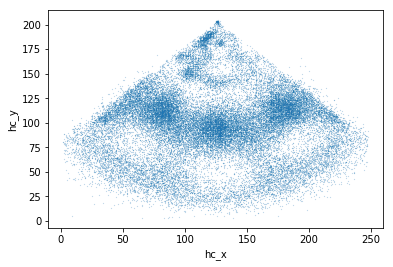

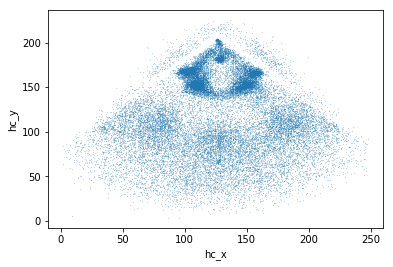

In [10]:
%matplotlib inline
total[total['hit'] == 1].plot(x='hc_x', y='hc_y', kind='scatter', s=0.01)
total[total['hit'] == 0].plot(x='hc_x', y='hc_y', kind='scatter', s=0.01)